## Analysis of CHO and FAT consumption for cycling activities

Short abstract

### Indirect calorimetry as starting point

### Preparation - Import the necessary Python modules

In [24]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt



### Setup of basic data & create a diagram
Currently, the data are extracted manually out of the diagram shown above.

In [25]:
# CHO consumption (g/h) vs. power output in watts
xs = np.array([0, 75, 100, 125, 150, 175, 200, 225, 275])
ys = np.array([21, 38, 50, 63, 83, 104, 121, 142, 250])

# FAT consumption (g/h) vs. power output in watts
xs2 = np.array([0, 125, 150, 175, 200, 225, 250, 275])
ys2 = np.array([13, 31, 31, 33, 29, 25, 17, 0])

### Print CHO & FAT consumption as diagram

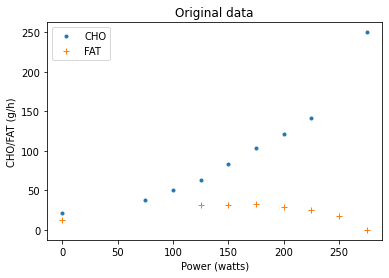

In [26]:
plt.plot(xs, ys, '.', label="CHO")
plt.plot(xs2, ys2, '+', label="FAT")
plt.title("Original data")
plt.xlabel("Power (watts)")
plt.ylabel("CHO/FAT (g/h)")
plt.legend(loc="upper left")

In [34]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

def squareExp(x, a, b, c):
    return a * np.square(x) + b * x + c

def fitQuality(func, yarray):
    sqDiffs = np.square(yarray - func)
    sqDiffsFromMean = np.square(yarray - np.mean(yarray))
    rSq = 1 - np.sum(sqDiffs) / np.sum(sqDiffsFromMean)
    return rSq

In [35]:
# perform the fit
p0 = (1, -0.1, 1)
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params

fit = np.polyfit(xs2, ys2, 2)
a, d, c = fit

In [36]:
# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

R² = 0.9936760064381591


In [37]:
# determine quality of the fit
squaredDiffs = np.square(ys2 - squareExp(xs2, a, d, c))
squaredDiffsFromMean = np.square(ys2 - np.mean(ys2))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

R² = 0.9250283256198031


In [40]:
# Quality of the CHO curve fit
#rS = fitQuality(monoExp(xs,m,t,b), ys)
#print(f"R² = {rS}")
print(f"CHO fit: R² = {fitQuality(monoExp(xs,m,t,b), ys)}")

CHO fit: R² = 0.9936760064381591


In [39]:
# Quality of the FAT curve fit
print(f"FAT fit: R² = {fitQuality(squareExp(xs2, a,d,c), ys2)}")

R2 = 0.9250283256198031


Text(0, 0.5, 'CHO (g/h)')

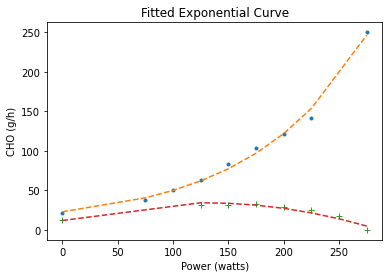

In [33]:
# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.plot(xs2, ys2, '+', label="fatdata")
plt.plot(xs2, squareExp(xs2, a, d, c), '--', label="fat")
plt.title("Fitted Exponential Curve")
plt.xlabel("Power (watts)")
plt.ylabel("CHO (g/h)")

In [32]:
# inspect the parameters
print(f"Y = {m} * e^({t} * x) + {b}")

Y = 16.4082248903284 * e^(-0.009753356363022837 * x) + 6.514511413977633


Text(0, 0.5, 'CHO (g/h)')

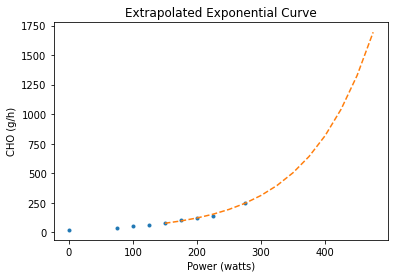

In [114]:
xs2 = np.arange(150,500,25)
ys2 = monoExp(xs2, m, t, b)

plt.plot(xs, ys, '.', label="data")
plt.plot(xs2, ys2, '--', label="fitted")
plt.title("Extrapolated Exponential Curve")
plt.xlabel("Power (watts)")
plt.ylabel("CHO (g/h)")

Use Case: Return value for a specific wattage

In [116]:
print(monoExp(190, m, t, b))

111.19580507076063


In [ ]:
# CHO consumption for a certain time period and given intensity 
# CHO consumption for an activity (already implemented)
# CHO consumption for an activity as accumulated graph to see impact of surges
# FAT consumption (absolut / percentage)
# Target cho consumption and derivation of intensity

# Analyse existing data files

# Analyse information out of the function itself
